<h1 style="color:#1DB954; text-align:center">Exploratory Data Analysis : Spotify</h1>

## Introduction
<span style="font-size:16px">[Spotify](https://open.spotify.com/) is an audio streaming application that needs no introduction. Over the span of 14 years, it has reached 286 million active users and 130 million premium subscriptions. An average user listens to Spotify for 25 hours in a month, 44% of the users dance with their souls through this app on a daily basis. These statistics clearly suggest that for a significant part of the world, Spotify is the go to address for the music.
In this notebook, we will try to , list the most popular artists, investigate the kinds of music we are listening to the most and genre behaviours over the years while questioning the genre definitions. For this analysis, we will use [Spotify Dataset](https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets?select=artists.csv) that contains over 500 thousand tracks.</span>

## Basis for Exploratory Data Analysis
<span style="font-size:16px">In this section, we'll briefly take a look at the features of the dataset, highlighting a few of them in order to have a better understanding for the rest of the analysis. It contains various features of a song both in technical perspective such as tempo, key, loudness, and also historical records such as release date, popularity. [Spotify API Documentation](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) already has clear definitions for these features. In order to access them a bit more practically, we will present these definitions and their scales here.</span>

<b>Feature Definitions</b>
 

1. <u>artists</u>: The list of artists of the song.

2. <u>danceability</u>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

3. <u>duration_ms</u>: The duration of the track in milliseconds.

4. <u>energy</u>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. (Float)

5. <u>explicit</u>: The content item is explicit and the user’s account is set to not play explicit content. Additional reasons may be added in the future. Note: If you use this field, make sure that your application safely handles unknown values.

7. <u>instrumentalness</u>: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

8. <u>key</u>: The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

9. <u>liveness</u>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

10. <u>loudness</u>: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

11. <u>mode</u>: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

12. <u>name</u>: Name of the song.

13. <u>popularity</u>: The popularity of the track. The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.

14. <u>release_date</u>: The date the album was first released, for example “1981-12-15”. Depending on the precision, it might be shown as “1981” or “1981-12”.

15. <u>speechiness</u>: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

16. <u>tempo</u>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

17. <u>valence</u>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

18. <u>year</u>: Year information extracted from release_date.

19. <u>genres</u>: A list of the genres used to classify the album. For example: “Prog Rock” , “Post-Grunge”. (If not yet classified, the array is empty.)

In [78]:
import numpy as np 
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt 

import plotly.express as px #Interactive Plots
import plotly.graph_objs as pgo #Interactive Plots
from plotly.subplots import make_subplots #Interactive Plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


import seaborn as sns 

In [79]:
df_tracks = pd.read_csv('tracks.csv')
df_tracks.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [80]:
# null values
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [81]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58



### 10 least popular song in the dataset

In [82]:
sorted_df = df_tracks.sort_values('popularity',ascending = True).head(10)
sorted_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
546130,181rTRhCcggZPwP2TUcVqm,"Newspaper Reports On Abner, 20 February 1935",0,896575,0,"['Norris Goff', 'Chester Lauck', 'Carlton Bric...","['3WCwCPDMpGzrt0Qz6quumy', '7vk8UqABg0Sga78GI3...",1935-02-20,0.595,0.262,8,-17.746,1,0.9320,0.993,0.007510,0.0991,0.320,79.849,4
546222,0yOCz3V5KMm8l1T8EFc60i,恋は水の上で,0,188440,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.418,0.388,0,-8.580,1,0.0358,0.925,0.000014,0.1050,0.439,94.549,4
546221,0y48Hhwe52099UqYjegRCO,私の誕生日,0,173467,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.642,0.178,5,-11.700,1,0.0501,0.993,0.000943,0.0928,0.715,119.013,4
546220,0xCmgtf9ka07hkZg3D6PaV,エル・チョクロ (EL CHOCLO),0,205280,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.695,0.467,0,-12.236,0,0.0422,0.827,0.000000,0.0861,0.756,125.941,4
546219,0tBXS3VuCPX7KWUFH2nros,恋は不思議なもの,0,185733,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.389,0.388,2,-8.221,1,0.0351,0.869,0.000000,0.0924,0.372,72.800,4
546218,0qrKnQtYDVJhKFAXTHYVS9,ゆうべはどうしたの (WHATSA MALLA U),0,183427,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.631,0.249,5,-11.883,1,0.0355,0.951,0.000000,0.0814,0.517,131.097,4
546217,0nqsDxOeKSwEzp3AUQAAqS,"Screen Director's Playhouse, Music For Million...",0,1767071,0,"['Wilms Herbert', 'June Allyson', 'Joseph Kear...","['2rbm8QWvmnVwxFo84EVM1h', '4yW5adMgyIfHFzaL9i...",1949-04-10,0.533,0.317,7,-13.047,1,0.9180,0.682,0.000000,0.3330,0.336,76.836,4
546216,0kGEdsxVLYjCdfxM9tbezd,ブルーマンボ,0,162147,0,['Hibari Misora'],['1m5pMY5blqJwdxJ7vqQtuN'],1949,0.529,0.546,0,-6.462,0,0.0418,0.784,0.000000,0.3750,0.903,128.604,4
546215,0bc3PUZurUUXrY7yqoOxjq,"Screen Director's Playhouse, Trade Winds direc...",0,1776652,0,"['Wally Maher', 'Tay Garnett', 'Lurene Tuttle'...","['7hkhJTTI3VnUGVWUt8SJXT', '3kYeeIpRCgJz4fQYDv...",1949-05-19,0.599,0.321,0,-15.428,0,0.9330,0.808,0.000000,0.5570,0.379,93.025,4
546214,0Wwm0ruSjYMIiWG0nyAI1F,"Screen Director's Playhouse, It's A Wonderful ...",0,1767576,0,"['Joseph Granby', 'Jimmy Stewart', 'Irene Tedr...","['6GK59BC4LJzqR0OpHAX2S3', '58BzBaExrnrx898sby...",1949-05-08,0.645,0.341,8,-12.177,1,0.8670,0.690,0.000000,0.1530,0.431,117.591,4


In [83]:
#Let's see how these numeric metrics are distributed.
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


We can see that most of the values are between 0 and 1, except duration_ms, loudness, popularity, tempo, time_singature and key.

### Top 10 most popular songs

In [84]:
most_popular = df_tracks.query('popularity>90', inplace=False).sort_values('popularity',ascending=False)
most_popular[:10]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


##### Let's set the index of the dataset as release_date, since we'll analyze the trends and changes through time. We do not consider the first row because it was an outlier to our dataset. 

In [85]:
# Set release date a index and turn it into time series in order to fix dates without month and day components
df_tracks.set_index("release_date",inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks = df_tracks.sort_index()
df_tracks = df_tracks[1:] #removing first row from our table
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
release_date,,,,,,,,,,,,,,,,,,,
1922-01-01,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,176218,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.146,0.635,8,-7.811,0,0.0458,0.990,0.797000,0.524,0.443,83.640,4
1922-01-01,4iy1fsAHBgR2STJjPDhjY2,Mes Parents Sont Venus Me Chercher,0,183840,0,['Fortugé'],['0hKr2636wsQI7PrARkAiaA'],0.554,0.204,7,-14.764,1,0.0598,0.995,0.000001,0.153,0.620,97.337,4
1922-01-01,4jhUNBqlFI21O7L0sKl507,As If I Didn't Have Enough On My Mind,0,148440,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.320,0.246,0,-15.790,1,0.0463,0.991,0.850000,0.419,0.312,84.275,4
1922-01-01,2ZtHe8CTjSD7zXRfPIgJnK,Keep young & beautiful,0,182069,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.820,0.508,3,-7.346,1,0.2990,0.978,0.008180,0.158,0.888,97.695,4
1922-01-01,2oPXTvPFj5GcB5719LxSRl,It had to be you,0,182857,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",0.468,0.356,7,-8.112,1,0.0576,0.996,0.905000,0.222,0.732,177.590,4


In [86]:
#Print oldest record
print(df_tracks.iloc[0])

id                                             3KfDZww1OqQK8yUiYpSkyX
name                                                         Jeannine
popularity                                                          0
duration_ms                                                    176218
explicit                                                            0
artists                        ['Abe Lyman’s Orchestra', 'Abe Lyman']
id_artists          ['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...
danceability                                                    0.146
energy                                                          0.635
key                                                                 8
loudness                                                       -7.811
mode                                                                0
speechiness                                                    0.0458
acousticness                                                     0.99
instrumentalness    

In [87]:
#Print most recent record
print(df_tracks.iloc[-1])

id                      7ID69hjzOgvBNs5Up3R83b
name                                      Azul
popularity                                   0
duration_ms                             206373
explicit                                     0
artists                           ['J Balvin']
id_artists          ['1vyhD5VmyZ7KMfW5gqLgo5']
danceability                             0.842
energy                                   0.828
key                                          6
loudness                                -2.495
mode                                         0
speechiness                             0.0696
acousticness                             0.101
instrumentalness                       0.00179
liveness                                0.0579
valence                                  0.653
tempo                                   94.015
time_signature                               4
Name: 2021-04-16 00:00:00, dtype: object


After printing the oldest and most recent song, we observe our dataset covers a century of songs.

#### To make it more readable, we will change the duration_ms from milliseconds to seconds.

In [88]:
def millisecondToSecond(x):
    return round(x/1000)

df_tracks["duration"] = df_tracks["duration_ms"].apply(millisecondToSecond)
df_tracks.drop("duration_ms",inplace = True , axis=1)

In [89]:
df_tracks.head(5)

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-01-01,3KfDZww1OqQK8yUiYpSkyX,Jeannine,0,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.146,0.635,8,-7.811,0,0.0458,0.990,0.797000,0.524,0.443,83.640,4,176
1922-01-01,4iy1fsAHBgR2STJjPDhjY2,Mes Parents Sont Venus Me Chercher,0,0,['Fortugé'],['0hKr2636wsQI7PrARkAiaA'],0.554,0.204,7,-14.764,1,0.0598,0.995,0.000001,0.153,0.620,97.337,4,184
1922-01-01,4jhUNBqlFI21O7L0sKl507,As If I Didn't Have Enough On My Mind,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.320,0.246,0,-15.790,1,0.0463,0.991,0.850000,0.419,0.312,84.275,4,148
1922-01-01,2ZtHe8CTjSD7zXRfPIgJnK,Keep young & beautiful,0,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",0.820,0.508,3,-7.346,1,0.2990,0.978,0.008180,0.158,0.888,97.695,4,182
1922-01-01,2oPXTvPFj5GcB5719LxSRl,It had to be you,0,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",0.468,0.356,7,-8.112,1,0.0576,0.996,0.905000,0.222,0.732,177.590,4,183


## Feature Analysis

In this section, we'll look at the correlations between the features and try to understand which of them might have an effect on the popularity. Addition to that, we'll see the number of tracks released on each year, average duration changes over the years, and most popular keys among these songs.

### Correlations

Let's see the correlations between continous metrics

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration')]

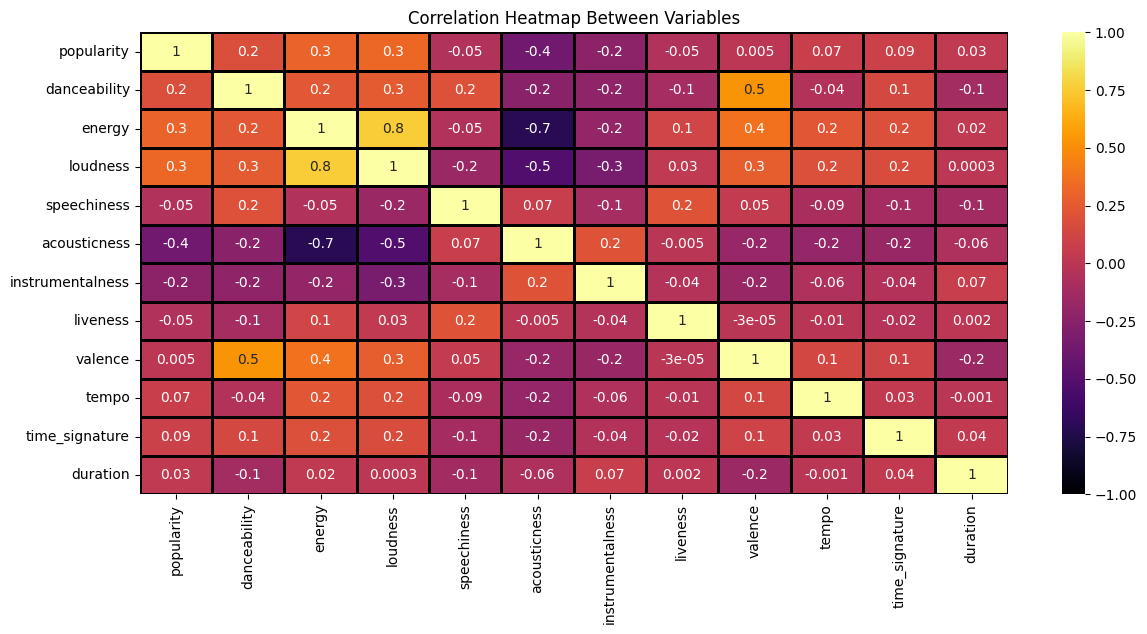

In [90]:
#Pearson Correlation Table
corr_df = df_tracks.drop(["key","mode","explicit"], axis = 1).corr(method = "pearson")
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, cmap = "inferno", linewidth = 1, linecolor = 'Black')
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels() , rotation = 90)

There are obvious correlations between some of the features by definition such as, acousticness and loudness, acousticness and energy and so on, which are not unexpected. What's interesting is the correlation between energy(or in acousticness) and popularity. Let's see them in more detail.

In [91]:
def plot_corr(feature_1, feature_2, title):
    corr_df = df_tracks[[feature_1, feature_2]]
    corr_df["feature_1_interval"] = pd.cut(df_tracks[feature_1], bins = np.arange(0, 1, 0.0001))
    #print(corr_df)
    corr_df = corr_df.groupby("feature_1_interval").median()
    plot = px.scatter(corr_df, x = feature_1, y = feature_2, trendline = "ols", trendline_color_override = "red")
    plot.update_traces(marker = dict(size = 5, color ='rgba(30, 215, 96, 0.9)', line = dict(width = 1)), selector = dict(mode ='markers'))
    plot.update_layout(title_text = title)

    plot.show()

In [92]:
#Popularity vs Acousticness
plot_corr("acousticness", "popularity", "Popularity vs Acousticness")

The graph here follows low negative correlation. We can see that in terms of acousticness, 0.05 is the sweet spot for popularity. It might be a slight indication that users are looking for more uplifting songs on Spotify, since increase in acousticness follows decrease in popularity. How about energy?

In [93]:
#Popularity vs Energy
corr_df = plot_corr("energy","popularity","Popularity vs Energy")

This graph follows low positive correlation. While there are low energy songs that are not highly popular, high energy songs are almost always welcomed by listeners. However, these indications are insufficient for a definite conclusion.

### Number of Tracks and Average Track Durations Over Years

In [94]:
#Number of entries over the years
fig = px.bar(df_tracks["id"].groupby(pd.Grouper(freq="Y")).count(),labels={
                     "release_date": "Release Year",
                     "value": "Number of tracks"})
fig.update_layout(height=600, width=1200, title_text="Number of Tracks Over Years")

fig.show()


Number of songs have been gradually increasing over the years except for the period of 2000s where it fell for 2 decades then started to increase again. This could be strictly related with the production numbers in those years.

In [95]:
#Average Duration over the years in seconds
fig = px.bar(df_tracks["duration"].groupby(pd.Grouper(freq="Y")).mean(),labels={
                     "release_date": "Release Year",
                     "value": "Track Duration (sec)"})
fig.update_layout(height=600, width=1200, title_text="Track Duration Over Years")

fig.show()

On average, the duration of the tracks are around 3 to 4 minutes. Let's see the most extreme outliers. Here is the longest track

In [96]:
df_tracks[ df_tracks['duration'] == df_tracks['duration'].max() ].iloc[0]

id                             3EEv9UCeZdn4MVFv8tsO1E
name                โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต
popularity                                          3
explicit                                            0
artists                               ['ท่านพุทธทาส']
id_artists                 ['2ySk9zib3PuomvMGmCqdTA']
danceability                                    0.638
energy                                          0.537
key                                                 8
loudness                                      -13.365
mode                                                1
speechiness                                     0.775
acousticness                                    0.825
instrumentalness                                  0.0
liveness                                        0.345
valence                                         0.401
tempo                                         131.446
time_signature                                      3
duration                    

"โครงสร้างแห่งสิ่งที่เรียกว่าชีวิต" is the longest song in our dataset with duration = 5621 seconds (93.6 mins). Lets see the track with shortest duration now.

In [97]:
df_tracks[ df_tracks['duration'] == df_tracks['duration'].min() ].iloc[0]

id                      52qf3kN9pExTlHdSlh3ZeR
name                               Pause Track
popularity                                   0
explicit                                     0
artists                    ['Louis Armstrong']
id_artists          ['19eLuQmk9aCobbVDHc6eek']
danceability                               0.0
energy                                     0.0
key                                          0
loudness                                 -60.0
mode                                         0
speechiness                                0.0
acousticness                               0.0
instrumentalness                           0.0
liveness                                   0.0
valence                                    0.0
tempo                                      0.0
time_signature                               0
duration                                     3
Name: 1925-01-01 00:00:00, dtype: object

The name of the track is "Pause Track" and it has -60 loudness and no tempo? Yes! Turns out there is such thing called a "Pause Track", which is a silent track in between songs that is recorded to vinly records in order the seperate a song from another song or seperate a group of songs from another group. Here are a few more Pause Tracks on this dataset.

In [98]:
#Pause Tracks
df_tracks[df_tracks['loudness'] == -60]

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1925-01-01,7nZNkbxnRyx1DqPC6ro6Je,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1925-01-01,7bgYtpP5qxWabDHsPY8Rwc,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1925-01-01,52qf3kN9pExTlHdSlh3ZeR,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
1925-01-01,4SjlyAejCNUB4MrGM1KuVp,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
1925-01-01,4WeyR22Ax2fF9dY0NxgjFV,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
1925-01-01,4ZyFcBGN2aU9vgX1nD9d38,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1925-01-01,35GlCW5aqb8iJAdLuUf7tF,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1925-01-01,2jdIDTMKpzrw7agn1Whtse,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
1925-01-01,2s6e7KLoQ5hie3Cnh73v2v,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],0.0,0.0,0,-60.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


### Key and Mode
Let's see the most used keys and the most popular mode of the dataset.

In [99]:
key_mapping = {0:"C",1:"C♯",2:"D",3:"D♯",4:"E",5:"F",6:"F♯",7:"G",8:"G♯",9:"A",10:"A♯",11:"B"}
key_counts_df = pd.DataFrame(df_tracks["key"].value_counts())

key_counts_df['key_names'] = key_counts_df.index.map(key_mapping)
# key_counts_df

key_labels = key_counts_df['key_names'].values
key_values = key_counts_df['key'].values

mode_mapping = {0:"Minor",1:"Major"}
mode_counts_df = pd.DataFrame(df_tracks["mode"].value_counts())
mode_counts_df['mode_names'] = mode_counts_df.index.map(mode_mapping)
# mode_counts_df

mode_labels = mode_counts_df['mode_names'].values
mode_values = mode_counts_df['mode'].values

fig = make_subplots(rows=1, cols=2,specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    pgo.Pie(labels=key_labels, values=key_values),row=1, col=1)

fig.add_trace(
    pgo.Pie(labels=mode_labels, values=mode_values),row=1, col=2)

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.update_layout(height=600, width=1200, title_text="Keys and Modes")
fig.show()

We have a major dominance on the mode and C-G-D-A are the most popular keys here.

## Genre Based Analysis
In this part, we will try to analyze the genre dataset and try to understand characterisctics of these genres. Let's take a look at the data first.

In [100]:
df_genre = pd.read_csv("SpotifyFeatures.csv")

In [101]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [102]:
pd.isnull(df_genre).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

We have 232725 genres and sub-genres in this dataset. Again for a better readabilty, we will convert the duration_ms metric to duration in seconds.

In [103]:
def millisecondToSecond(x):
    return round(x/1000)

df_genre["duration"] = df_genre["duration_ms"].apply(millisecondToSecond)
df_genre.drop("duration_ms",inplace = True , axis=1)

In [104]:
#Number of genres
print(f"Number of unique genres : {df_genre['genre'].nunique()}")

Number of unique genres : 27


Dropped "artist name", "track name" and "track id" from the table and then grouped all songs by Genre. After grouping them we changed the index.

In [105]:
df_genre.drop(['artist_name', 'track_name', 'track_id'], axis=1, inplace=True)
df_genre_grouped = df_genre.groupby(['genre']).mean()
df_genre_grouped['S.no'] = range(1, len(df_genre_grouped) + 1)
df_genre_grouped['genre'] = df_genre_grouped.index
df_genre_grouped.set_index('S.no', inplace=True)
df_genre.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903
valence,232725.0,0.454917,0.260065,0.00000,0.2370,0.444000,0.6600,1.000


In [106]:
df_genre_grouped.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,genre
S.no,,,,,,,,,,,,
1,9.302521,0.829941,0.412252,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724,204.529412,A Capella
2,50.213430,0.162313,0.541898,0.711519,0.061303,0.196985,-6.540803,0.088783,122.534485,0.449590,233.241283,Alternative
3,24.258729,0.286843,0.472090,0.665356,0.280592,0.192391,-7.917802,0.065102,126.629156,0.441682,229.931625,Anime
4,34.742879,0.327840,0.528232,0.606171,0.095175,0.233125,-9.053807,0.061809,121.137637,0.579425,251.934501,Blues
5,4.252637,0.591781,0.697475,0.396880,0.143572,0.164894,-11.641760,0.117279,121.131288,0.675956,142.728114,Children's Music


### Genre Popularity
Let's see the most popular genres and least popular genres

In [107]:
#Most popular genres
print("Most popular genres")
df_genre_grouped.sort_values("popularity", ascending = False).head()

Most popular genres


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,genre
S.no,,,,,,,,,,,,
18,66.590667,0.224819,0.640236,0.642208,0.016599,0.179967,-6.495423,0.107963,121.175844,0.481371,220.859685,Pop
20,60.533795,0.168080,0.697244,0.650520,0.009317,0.198939,-6.669916,0.188186,121.100808,0.455918,219.858752,Rap
23,59.619392,0.196429,0.538292,0.683670,0.053288,0.186981,-7.285875,0.053664,122.629630,0.517113,237.000108,Rock
13,58.423131,0.176172,0.718808,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381,219.981495,Hip-Hop
10,57.275256,0.152888,0.638191,0.698067,0.035449,0.187753,-6.054241,0.083608,120.795919,0.517754,226.263878,Dance


In [108]:
#Least popular genres
print("Least popular genres")
df_genre_grouped.sort_values("popularity", ascending = False).tail()

Least popular genres


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,genre
S.no,,,,,,,,,,,,
8,21.342630,0.793098,0.559038,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764,235.307923,Comedy
17,13.335628,0.945202,0.290650,0.168779,0.232013,0.223264,-19.339767,0.059720,101.802977,0.189864,259.160386,Opera
16,12.174097,0.697341,0.491186,0.370703,0.125427,0.228715,-12.952094,0.109400,113.946770,0.447808,210.407891,Movie
1,9.302521,0.829941,0.412252,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724,204.529412,A Capella
5,4.252637,0.591781,0.697475,0.396880,0.143572,0.164894,-11.641760,0.117279,121.131288,0.675956,142.728114,Children's Music


In [113]:
famous = df_genre_grouped.sort_values("popularity",ascending=True)
# famous
fig = px.bar(famous, y = 'genre', x = 'popularity', orientation='h')
fig.update_layout(height=600, width=1100, title_text="Genres by popularity")
fig.show()

### Genre Durations
The genres with longest durations and shortest durations on average.

In [110]:
print("longest Durations")
df_genre_grouped.sort_values("duration",ascending = False).head()

longest Durations


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,genre
S.no,,,,,,,,,,,,
27,35.524077,0.393341,0.443293,0.506453,0.233882,0.227793,-10.705435,0.045766,119.821152,0.295657,315.322779,World
7,29.282195,0.868843,0.305958,0.177984,0.599425,0.162810,-21.544477,0.052001,104.341807,0.214463,310.337619,Classical
11,38.056095,0.119839,0.619542,0.739299,0.350955,0.210006,-7.035868,0.098988,125.845967,0.388129,269.198358,Electronic
15,40.824383,0.499606,0.585638,0.472776,0.358009,0.173355,-11.210457,0.072304,111.783658,0.508961,265.642729,Jazz
17,13.335628,0.945202,0.290650,0.168779,0.232013,0.223264,-19.339767,0.059720,101.802977,0.189864,259.160386,Opera


In [111]:
print("Shortest Durations")
df_genre_grouped.sort_values("duration",ascending=False).tail()

Shortest Durations


,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration,genre
S.no,,,,,,,,,,,,
16,12.174097,0.697341,0.491186,0.370703,0.125427,0.228715,-12.952094,0.109400,113.946770,0.447808,210.407891,Movie
1,9.302521,0.829941,0.412252,0.250313,0.007491,0.136924,-13.660387,0.042414,111.518950,0.328724,204.529412,A Capella
26,33.954800,0.717349,0.265616,0.221110,0.783611,0.137555,-19.282684,0.043852,104.083509,0.118483,192.609475,Soundtrack
24,28.612351,0.099728,0.526799,0.815585,0.056709,0.243473,-6.172705,0.089158,129.427622,0.653472,191.547780,Ska
5,4.252637,0.591781,0.697475,0.396880,0.143572,0.164894,-11.641760,0.117279,121.131288,0.675956,142.728114,Children's Music


In [112]:
genre_duration = df_genre_grouped.sort_values("duration",ascending=True)
# genre_duration
fig = px.bar(genre_duration, y = 'genre', x = 'duration', orientation='h')
fig.update_layout(height=600, width=1100, title_text="Duration of the songs in different genres")
fig.show()

# Conclusion


Spotify is becoming a music authority every single day as a medium where "success metrics" of the music industry, if you believe in them, can be clearly observed. Moreover, it also presents hidden or forgotten gems to users who like to discover beautiful pieces and more silent stories. One thing we can say for certain is that Spotify is responsible for the majority of people's mood each day. It is the most popular medium to choose when we users need a break from the outside world, or when we want to party and socialize with others. The best friend of humankind found its way in Spotify to keep shaping our lives.